In [1]:
%matplotlib inline

In [2]:
import os
import sys
import numpy as np
import matplotlib

if not sys.version_info.major is 3:
    print('PyRadarKit requires Python 3')
    raise

In [3]:
import chart
import radarkit

In [4]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Arial']
matplotlib.rcParams['font.sans-serif'] = ['System Font', 'Verdana', 'Arial']
matplotlib.rc('text', usetex=False)

In [5]:
# Read a file
# sweep = radarkit.read('data/PX-20130520-202639-E2.6-Z.nc')
# sweep = radarkit.read('/Users/boonleng/Downloads/PX-20180308-043920-E4.5/PX-20180308-043920-E4.5-Z.nc')
# sweep = radarkit.read('')
# sweep = radarkit.read('/Users/boonleng/Downloads/PX1K-examples/PX1K-20180625-135605-E4.0-Y.nc')
# sweep = radarkit.read('/Users/boonleng/Downloads/PX1K-examples/PX1K-20180625-135605-E4.0-Z.nc')
sweep = radarkit.read('/Users/boonleng/Downloads/PX-20150709-034527-E4.0/PX-20150709-034527-E4.0-Z.nc')

In [6]:
if sweep is None:
    print('Unable to continue.\n')
    raise

In [7]:
# Number of gates that we want to show
ng = 1000

# Original range (km) and zimuth (rad) of the data
r, a = np.meshgrid(1.0e-3 * sweep['range'][0:ng], sweep['azimuth'] * (np.pi / 180.0))

# Cartesian coordinate of the radar cells
x = r * np.sin(a)
y = r * np.cos(a)

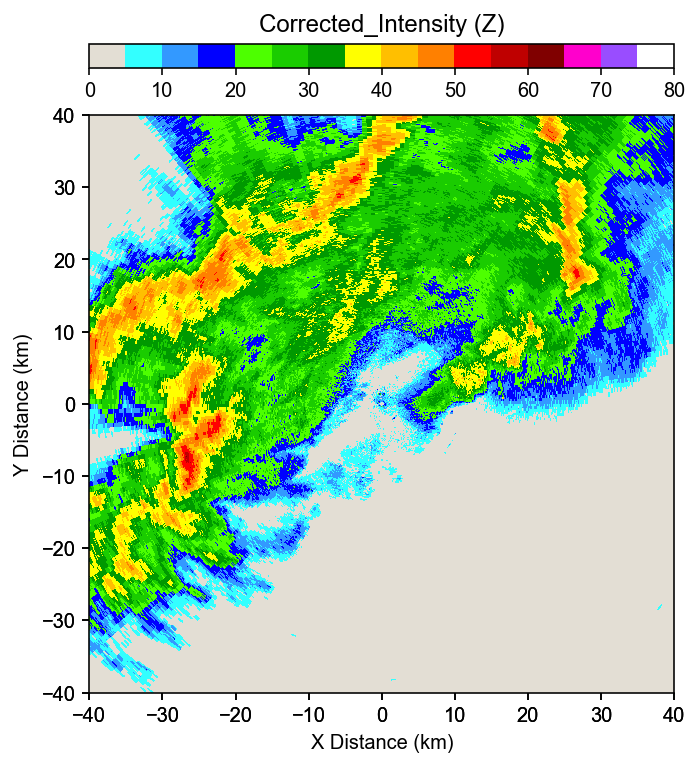

In [8]:
# Find Z and plot it
for moment in sweep['moments']:
    if not 'Z' is moment['symbol']:
        continue
    symbol = moment['symbol']
    name = moment['name']
    data = moment['data'][:, 0:ng]
    ppi = chart.showPPI(x, y, data, title='{} ({})'.format(name, symbol))

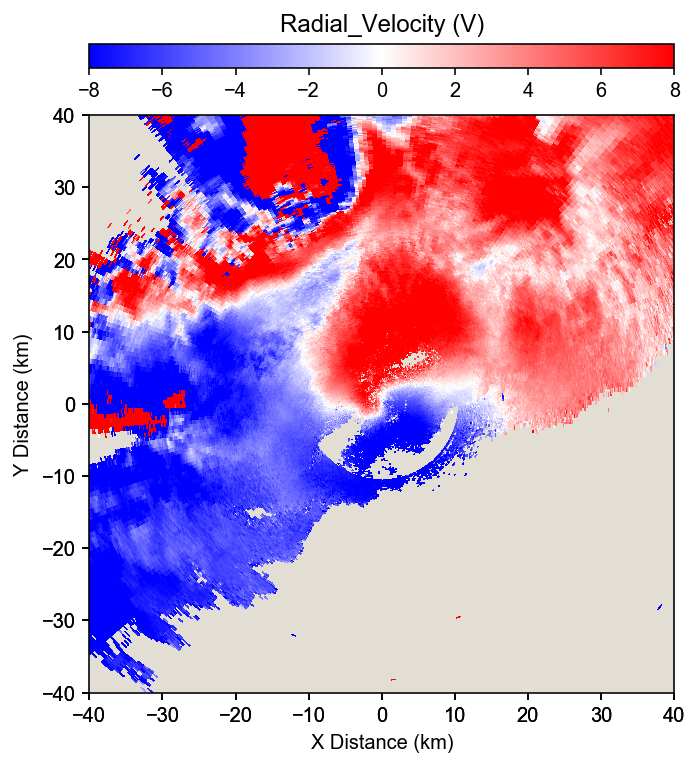

In [9]:
for moment in sweep['moments']:
    if not 'V' is moment['symbol']:
        continue
    symbol = moment['symbol']
    name = moment['name']
    data = moment['data'][:, 0:ng]
    cmap = matplotlib.pyplot.get_cmap('bwr')
    ppi = chart.showPPI(x, y, data, cmap=cmap, vmin=-8.0, vmax=8.0, title='{} ({})'.format(name, symbol))

In [ ]:
for moment in sweep['moments']:
    if not moment is None:
        symbol = moment['symbol']
        name = moment['name']
        data = moment['data'][:, 0:ng]
        ppi = chart.showPPI(x, y, data, title='{} ({})'.format(name, symbol))